## Кубические сплайны

$\textbf{Кубический сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := d_k + c_k (x-x_k) + b_k (x-x_k)^2 + a_k (x-x_k)^3,$$ 

где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$

$\textbf{Обозначение кубического сплайна дефекта 1}$: $S^n_{3,2}$, где $n, 3, 2$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.

$\textbf{Краевые условия}$: 
$$ \textbf{1)}\; c(x_k) = f(x_k), \;\; \textbf{2)}\; c(x) \in C^2([a,b]), \;\; \textbf{3)}\; c''(a) = c''(b)=0$$
При выполнении условия $\textbf{3)}$ сплайн называется $\textbf{естественным}$.

In [140]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True)

In [141]:
# Матрица в виде AB = C  
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2

In [142]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
m = int(input('Введите кол-во равноотстоящих узлов m (целое число): '))
x = np.linspace(a, b, m)

# m - число узлов
n = m - 1
# n - число кубических сплайнов

A = np.zeros((4*n, 4*n))
C = np.zeros(4*n)

for i in range(n):
    A[i, i] = x[i]**3
    A[i, n+i] = x[i]**2
    A[i, 2*n+i] = x[i]
    A[i, 3*n+i] = 1

    # Строки [n, 2n-1]
    A[n+i, i] = x[i+1]**3
    A[n+i, n+i] = x[i+1]**2
    A[n+i, 2*n+i] = x[i+1]
    A[n+i, 3*n+i] = 1

    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])

# Строки [2n, 3n-1]
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    #start at j+1 since derivatives are equal at the interior points
    values = 3*x[j+1]**2, -3*x[j+1]**2, 2*x[j+1], -2*x[j+1], 1, -1
    A[row, [columns]] = values

    # Значения функции для рядов C из промежутка [2n: 3n-1] равны нулю, поскольку мы приравниваем произвдоные

# Строки [3n-1, 4n-2]
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    values = 6*x[q+1], -6*x[q+1], 2, -2
    A[row, [columns]] = values
    # Значения функции для рядов C из промежутка [3n-1: 4n-2] равны нулю, поскольку мы приравниваем произвдоные

# Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
# чтобы получить два дополнительных уравнения - естественный сплайн
A[4*n-2, [0,n]] = 6*x[0], 2
A[4*n-1, [n-1,2*n-1]] =  6*x[n], 2

# Решаем относительно b
B = np.linalg.solve(A,C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:3*n]
di = B[3*n:]

Введите левую границу a: -10
Введите правую границу b: 10
Введите кол-во равноотстоящих узлов m (целое число): 1000


## Изобразим $S_{3,2}^m$ по равноотстоящим узлам

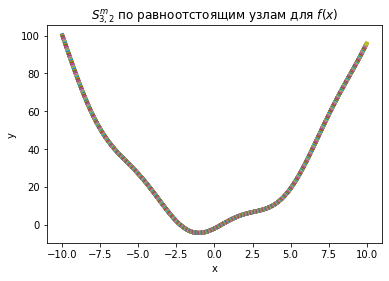

In [143]:
plt.figure()

for k in range(n):
    xspline = np.linspace(x[k], x[k+1])
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k]    
    plt.plot(xspline, yspline, '-', linewidth=4)

plt.xlabel('x')
plt.ylabel('y')
plt.title('$S_{3,2}^m$ по равноотстоящим узлам для $f(x)$')

plt.show()

## Функция для вычисления значений с помощью $S_{3,2}^n$

In [144]:
def cubic_spline(arg):
    flag = 0
    res = 0
    # Нахождение нужного участка интервала с помощью цикла
    for i in range(n):
        if (arg >= x[i]) and (arg <= x[i+1]):
            flag = i
            res = ai[flag]*arg**3 + bi[flag]*arg**2 + ci[flag]*arg + di[flag]
    return res

In [145]:
cubic_spline(-9)

77.35152605905489

## Кубические сплайны по оптимальным узлам Чебышева $$x_i = 0.5 \left((b-a)\cos\dfrac{(2i+1)\pi}{2(n+1)} + (b+a)\right),\; i\in \overline{0,n}$$

In [146]:
# m - число узлов
# n - число кубических сплайнов
# n сплайнов, у каждого 3 неизвестных, итого 3*n неизвестных
# Значит, нужно решить 3*n уравнений
n = m - 1

chebish = []
for i in range(0, m):
    chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))
    

A_opt = np.zeros((4*n, 4*n))*1.0
C_opt = np.zeros(4*n)*1.0

for i in range(n):
    A_opt[i, i] = chebish[i]**3
    A_opt[i, n+i] = chebish[i]**2
    A_opt[i, 2*n+i] = chebish[i]
    A_opt[i, 3*n+i] = 1
    
    # Строки [n, 2n-1]
    A_opt[n+i, i] = chebish[i+1]**3
    A_opt[n+i, n+i] = chebish[i+1]**2
    A_opt[n+i, 2*n+i] = chebish[i+1]
    A_opt[n+i, 3*n+i] = 1

    
    C_opt[i] = fn(chebish[i])
    C_opt[n+i] = fn(chebish[i+1])

# Строки [2n, 3n-1]
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    # start at j+1 since derivatives are equal at the interior points
    values = 3*chebish[j+1]**2, -3*chebish[j+1]**2, 2*chebish[j+1], -2*chebish[j+1], 1, -1
    A_opt[row, [columns]] = values
   
    # Значения функции для рядов C из промежутка [2n: 3n-1] равны нулю, поскольку мы приравниваем произвдоные

    # Строки [3n-1, 4n-2]
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    values = 6*chebish[q+1], -6*chebish[q+1], 2, -2
    A_opt[row, [columns]] = values
    # Значения функции для рядов C из промежутка [3n-1: 4n-2] равны нулю, поскольку мы приравниваем произвдоные
    
# Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
# чтобы получить два дополнительных уравнения - естественный сплайн
A_opt[4*n-2, [0,n]] = 6*chebish[0], 2
A_opt[4*n-1, [n-1,2*n-1]] =  6*chebish[n], 2

# Решаем относительно b
B_opt = np.linalg.solve(A_opt, C_opt)

ai_opt = B_opt[:n]
bi_opt = B_opt[n:2*n]
ci_opt = B_opt[2*n:3*n]
di_opt = B_opt[3*n:]

## Изобразим  $S^m_{3,2}$ по оптимальным узлам Чебышева

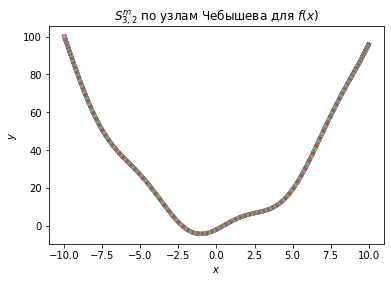

In [147]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt**3 + bi_opt[k]*xspline_opt**2 + ci_opt[k]*xspline_opt + di_opt[k]    
    plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$S_{3,2}^m$ по узлам Чебышева для $f(x)$')

plt.show()

## Функция для вычисления значений с помощью $S_{3,2}^n$

In [148]:
def optimal_cubic_spline(arg):
    flag = 0
    res = 0
    # Нахождение нужного участка интервала с помощью цикла
    for i in range(n):
        if (arg <= chebish[i]) and (arg >= chebish[i+1]):
            flag = i
            res = ai_opt[flag]*arg**3 + bi_opt[flag]*arg**2 + ci_opt[flag]*arg + di_opt[flag]
    return res

In [149]:
optimal_cubic_spline(-9)

77.3515260591015

## Найдем максимальные отклонения $RS_{3,2}^n, RS_{3,2}^{n_{opt}}$

In [153]:
k = int(input('Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: '))
max_nodes = int(input('Введите максимальное количество max_nodes узлов: '))
# mds = maximum_difference_segment
mds = np.linspace(a, b, k)

func_mds = []
spline_mds = []
optimal_spline_mds = []
RSn_mp = []
RSn_opt_mp = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(fn(i))

print('Таблица 1:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp \t\t | max RSn_opt_mp \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(3, max_nodes + 1):
    #---------------------------------------------------------------------------
    # SPLINE, создаем сплайны по равноотстоящим узлам
    #---------------------------------------------------------------------------
    # n - число кубических сплайнов
    n = pp - 1
    xx = np.linspace(a, b, pp)
      
    A = np.zeros((4*n, 4*n))
    C = np.zeros(4*n)

    for i in range(n):
        A[i, i] = xx[i]**3
        A[i, n+i] = xx[i]**2
        A[i, 2*n+i] = xx[i]
        A[i, 3*n+i] = 1

        # Строки [n, 2n-1]
        A[n+i, i] = xx[i+1]**3
        A[n+i, n+i] = xx[i+1]**2
        A[n+i, 2*n+i] = xx[i+1]
        A[n+i, 3*n+i] = 1

        C[i] = fn(xx[i])
        C[n+i] = fn(xx[i+1])

    # Строки [2n, 3n-1]
    for j in range(n-1):
        row = 2*n+j
        columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
        #start at j+1 since derivatives are equal at the interior points
        values = 3*xx[j+1]**2, -3*xx[j+1]**2, 2*xx[j+1], -2*xx[j+1], 1, -1
        A[row, [columns]] = values

    # Строки [3n-1, 4n-2]
    for q in range(n-1):
        row = 3*n-1 + q
        columns = [q, q+1, n+q, n+q+1]
        values = 6*xx[q+1], -6*xx[q+1], 2, -2
        A[row, [columns]] = values

    # Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
    # чтобы получить два дополнительных уравнения - естественный сплайн
    A[4*n-2, [0, n]] = 6*xx[0], 2
    A[4*n-1, [n-1, 2*n-1]] =  6*xx[n], 2

    # Решаем относительно b
    B = np.linalg.solve(A,C)

    ai = B[:n]
    bi = B[n:2*n]
    ci = B[2*n:3*n]
    di = B[3*n:]
    
    #---------------------------------------------------------------------------
    # SPLINE_optimal, создаем сплайны по узлам Чебышева
    #---------------------------------------------------------------------------
    
    chebish = []
    for i in range(0, pp):
        chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(pp+1))) + (b+a)))

    A_opt = np.zeros((4*n, 4*n))*1.0
    C_opt = np.zeros(4*n)*1.0

    for i in range(n):
        A_opt[i, i] = chebish[i]**3
        A_opt[i, n+i] = chebish[i]**2
        A_opt[i, 2*n+i] = chebish[i]
        A_opt[i, 3*n+i] = 1

        # Строки [n, 2n-1]
        A_opt[n+i, i] = chebish[i+1]**3
        A_opt[n+i, n+i] = chebish[i+1]**2
        A_opt[n+i, 2*n+i] = chebish[i+1]
        A_opt[n+i, 3*n+i] = 1


        C_opt[i] = fn(chebish[i])
        C_opt[n+i] = fn(chebish[i+1])

    # Строки [2n, 3n-1]
    for j in range(n-1):
        row = 2*n+j
        columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
        values = 3*chebish[j+1]**2, -3*chebish[j+1]**2, 2*chebish[j+1], -2*chebish[j+1], 1, -1
        A_opt[row, [columns]] = values

    # Строки [3n-1, 4n-2]
    for q in range(n-1):
        row = 3*n-1 + q
        columns = [q, q+1, n+q, n+q+1]
        values = 6*chebish[q+1], -6*chebish[q+1], 2, -2
        A_opt[row, [columns]] = values

    # Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
    # чтобы получить два дополнительных уравнения - естественный сплайн
    A_opt[4*n-2, [0, n]] = 6*chebish[0], 2
    A_opt[4*n-1, [n-1, 2*n-1]] =  6*chebish[n], 2

    # Решаем относительно b
    B_opt = np.linalg.solve(A_opt, C_opt)

    ai_opt = B_opt[:n]
    bi_opt = B_opt[n:2*n]
    ci_opt = B_opt[2*n:3*n]
    di_opt = B_opt[3*n:]

    #---------------------------------------------------------------------------
    # Ищем отклонения     
    #---------------------------------------------------------------------------

    for p in mds:
        # значения линейного сплайна S_{3,2}^n в точках x0, x1, ..., xk; k >> n   
        spline_mds.append(cubic_spline(p))
        # значения линейного сплайна S_{3,2}^{n_opt} в точках x0, x1, ..., xk; k >> n        
        optimal_spline_mds.append(optimal_cubic_spline(p))
            
    # отклонения
    for j in range(1, len(mds)):
        RSn_mp.append(np.absolute(func_mds[j] - spline_mds[j]))
        RSn_opt_mp.append(np.absolute(func_mds[j] - optimal_spline_mds[j]))
    RSn_mp_max = max(RSn_mp)
    RSn_opt_mp_max = max(RSn_opt_mp)
    
    print('|\t', pp, '\t|\t\t', k, '\t  |', RSn_mp_max, '\t|', RSn_opt_mp_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RSn_mp = []
    RSn_opt_mp = []
    RSn_mp_max, RSn_opt_mp_max = 0, 0
    spline_mds = []
    optimal_spline_mds = []

Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: 990
Введите максимальное количество max_nodes узлов: 250
Таблица 1:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp 		 | max RSn_opt_mp 		|
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 990 	  | 99.559168361819 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 990 	  | 159.44645081018552 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 990 	  | 409.7712876412872 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 6 	|		 990 	  | 

|	 49 	|		 990 	  | 10129.543749802644 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 50 	|		 990 	  | 10407.086178467633 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 51 	|		 990 	  | 10682.53562958179 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 52 	|		 990 	  | 10955.908324578615 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 53 	|		 990 	  | 11227.219948600457 	| 99.70373182388259 		 |
-----------------------------------------------------------------------------------------------------------
|	 54 	|		 990 	  | 11496.48567578487 	| 99.70373182388259 		 |
------------------------------------------------------------------------

|	 101 	|		 990 	  | 9856.639692675584 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 102 	|		 990 	  | 22309.55973024711 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 103 	|		 990 	  | 22491.99096339475 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 104 	|		 990 	  | 22672.8283627387 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 105 	|		 990 	  | 22852.078491467255 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 106 	|		 990 	  | 23029.74787042185 	| 95.82391555644251 		 |
----------------------------------------------------------------------

|	 151 	|		 990 	  | 29488.60419609629 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 152 	|		 990 	  | 29600.11056147947 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 153 	|		 990 	  | 29710.31298332151 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 154 	|		 990 	  | 29819.216915281493 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 155 	|		 990 	  | 29926.827794580902 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 156 	|		 990 	  | 30033.151041542882 	| 95.82391555644251 		 |
-------------------------------------------------------------------

|	 199 	|		 990 	  | 33461.901927571445 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 200 	|		 990 	  | 33516.754188354316 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 201 	|		 990 	  | 11561.053620618533 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 202 	|		 990 	  | 33751.414265823245 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 203 	|		 990 	  | 33803.47203786423 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 204 	|		 990 	  | 33854.48548802502 	| 95.82391555644251 		 |
------------------------------------------------------------------

|	 248 	|		 990 	  | 35137.51703128765 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 249 	|		 990 	  | 35146.42570165381 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 250 	|		 990 	  | 35154.50371761463 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
